In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(
    r"C:\project 3\bank.csv",
    sep=";",
    engine="python"
)

df.columns = df.columns.str.strip()
df.head()


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [1]:
import pandas as pd

df = pd.read_csv(r"C:\project 3\bank.csv")


In [2]:
df = df.iloc[:, 0].str.split(";", expand=True)


In [3]:
df.columns = [
    'age', 'job', 'marital', 'education', 'default', 'balance',
    'housing', 'loan', 'contact', 'day', 'month', 'duration',
    'campaign', 'pdays', 'previous', 'poutcome', 'y'
]


In [4]:
df = df.apply(lambda x: x.str.replace('"', ''))


In [5]:
df.shape
df.columns
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
X = df.drop("y", axis=1)
y = df["y"]


In [7]:
numeric_cols = ['age','balance','day','duration','campaign','pdays','previous']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.8939226519337017


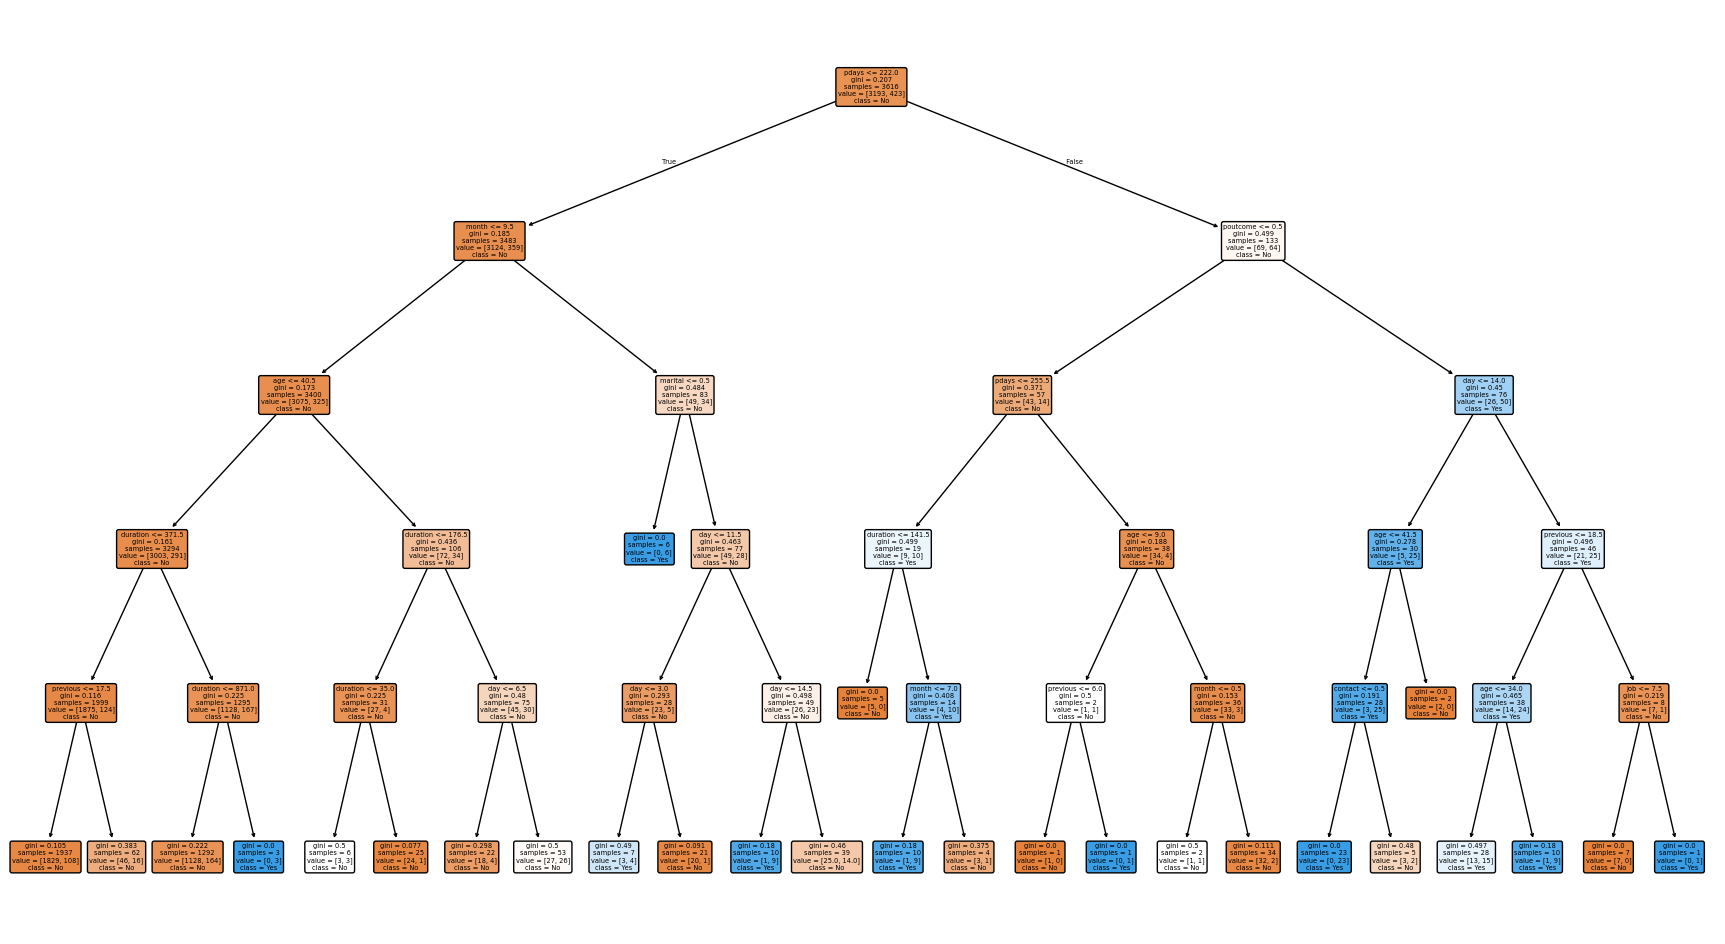

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.show()


In [12]:
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


pdays        0.286113
duration     0.143531
month        0.133099
age          0.116071
day          0.115274
poutcome     0.077033
previous     0.064767
marital      0.031364
contact      0.020573
job          0.012175
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
campaign     0.000000
dtype: float64

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[800   7]
 [ 89   9]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       807
           1       0.56      0.09      0.16        98

    accuracy                           0.89       905
   macro avg       0.73      0.54      0.55       905
weighted avg       0.86      0.89      0.86       905

